<a href="https://colab.research.google.com/github/Imane0021/python_project/blob/main/Statistics_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Student Performance Analysis

### Applied Statistics & Data Analysis – Dat@til Course

This project analyzes a student performance dataset to identify factors that may influence academic results.
In this notebook we will carried out a complete analysis of a student performance dataset. We began with data cleaning and descriptive statistics to understand the main features of the data. We then used graphical tools and normality tests to study distributions, followed by hypothesis tests to compare groups on their average Math scores.
Finally, we fitted and evaluated a multiple linear regression model to predict Math scores from other variables.

## Descriptive Statistics Section

In [34]:
#Importing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [35]:
# 2. Load the Dataset
df = pd.read_csv('student_performance.csv')
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [36]:
# 3. Rename Columns
df.rename(columns={
    'math score': 'Math',
    'reading score': 'Reading',
    'writing score': 'Writing',
    'race/ethnicity': 'Ethnicity',
    'parental level of education': 'Parental_Edu',
    'test preparation course': 'Prep_Course'
}, inplace=True)

df.columns

Index(['gender', 'Ethnicity', 'Parental_Edu', 'lunch', 'Prep_Course', 'Math',
       'Reading', 'Writing'],
      dtype='object')

In [37]:
# 4. Check for Missing Values
df.isnull().sum()

,0
gender,0
Ethnicity,0
Parental_Edu,0
lunch,0
Prep_Course,0
Math,0
Reading,0
Writing,0


In [38]:
# 5. Handle Missing Values
print("Missing Values After Handling:")
print(df.isnull().sum())

Missing Values After Handling:
gender          0
Ethnicity       0
Parental_Edu    0
lunch           0
Prep_Course     0
Math            0
Reading         0
Writing         0
dtype: int64


In [39]:
# 6. Convert Data Types
categorical_cols = ['gender', 'Ethnicity', 'Parental_Edu', 'lunch', 'Prep_Course']
for col in categorical_cols:
    df[col] = df[col].astype('category')

df.dtypes

,0
gender,category
Ethnicity,category
Parental_Edu,category
lunch,category
Prep_Course,category
Math,int64
Reading,int64
Writing,int64


In [40]:
# 7. Remove Duplicates
print("Duplicates before:", df.duplicated().sum())
df.drop_duplicates(inplace=True)
print("Duplicates after:", df.duplicated().sum())

Duplicates before: 0
Duplicates after: 0


In [41]:
# 8.Quick Checks
print("Number of Students:", len(df))

print("Number of Students by Gender:")
print(df['gender'].value_counts())

print("Number of Students by Ethnicity:")
print(df['Ethnicity'].value_counts())

print("Number of Students by Parental Education:")
print(df['Parental_Edu'].value_counts())

print("Number of Students by Lunch:")
print(df['lunch'].value_counts())

print("Number of Students by Test Preparation Course:")
print(df['Prep_Course'].value_counts())
print()

Number of Students: 1000
Number of Students by Gender:
gender
female    518
male      482
Name: count, dtype: int64
Number of Students by Ethnicity:
Ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64
Number of Students by Parental Education:
Parental_Edu
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64
Number of Students by Lunch:
lunch
standard        645
free/reduced    355
Name: count, dtype: int64
Number of Students by Test Preparation Course:
Prep_Course
none         642
completed    358
Name: count, dtype: int64



In [42]:
data = pd.read_csv('student_performance.csv')

In [43]:
df[['Math', 'Reading', 'Writing']].agg(['mean', 'median', 'std'])

,Math,Reading,Writing
mean,66.08900,69.169000,68.054000
median,66.00000,70.000000,69.000000
std,15.16308,14.600192,15.195657


Interpretation:
- The **mean** represents the center of the data (average performance).  
- The **median** is robust to outliers.  
- The **standard deviation** shows how spread out the students’ scores are.  

In [73]:
def show_average(column):
    print(f"\nAverage Math score for each group in {column}:")
    avg = df.groupby(column)["Math"].mean()
    print(avg)
    print("-" * 40)
    return avg
show_average("gender")
show_average("Prep_Course")
show_average("Ethnicity")


Average Math score for each group in gender:
gender
female    63.633205
male      68.728216
Name: Math, dtype: float64
----------------------------------------

Average Math score for each group in Prep_Course:
Prep_Course
completed    69.695531
none         64.077882
Name: Math, dtype: float64
----------------------------------------

Average Math score for each group in Ethnicity:
Ethnicity
group A    61.629213
group B    63.452632
group C    64.463950
group D    67.362595
group E    73.821429
Name: Math, dtype: float64
----------------------------------------


,Math
Ethnicity,
group A,61.629213
group B,63.452632
group C,64.463950
group D,67.362595
group E,73.821429


In [84]:
def best_group(column):
    avg = df.groupby(column)["Math"].mean()
    top = avg.idxmax()
    score = avg.max()
    print(f"The best group in {column} is '{top}' with an average Math score of {score:.2f}")
    print("-" * 40)
    return top, score

In [83]:
best_group("Ethnicity")

The best group in Ethnicity is 'group E' with an average Math score of 73.82
----------------------------------------


('group E', 73.82142857142857)

In [49]:
best_group("lunch")

The best group in lunch is 'standard' with an average score of 70.03
----------------------------------------


('standard', 70.03410852713178)

In [82]:
def summary():
    print("\n--- SUMMARY ---")
    print("Students who did the test preparation course scored higher on average.")
    print("Students whose parents have higher education levels tend to perform better in Math.")
    print("Those who receive standard lunch generally perform better than those with free/reduced lunch.")
    print("Gender and ethnicity differences exist, but they are relatively small compared to preparation and parental education effects.")
    print("-" * 40)

summary()


--- SUMMARY ---
Students who did the test preparation course scored higher on average.
Students whose parents have higher education levels tend to perform better in Math.
Those who receive standard lunch generally perform better than those with free/reduced lunch.
Gender and ethnicity differences exist, but they are relatively small compared to preparation and parental education effects.
----------------------------------------


In [85]:
def show_examples_loc_iloc():
    print("\nExamples of loc and iloc usage:")

    girls = df.loc[df["gender"] == "female"]
    print(f"There are {len(girls)} female students.")

    print("\nFirst 3 rows and first 3 columns using iloc:")
    print(df.iloc[:3, :3])

    print("\nDetails of the first student using loc:")
    print(df.loc[0])  # 0 = first row
    print("-" * 40)

show_examples_loc_iloc()


Examples of loc and iloc usage:
There are 518 female students.

First 3 rows and first 3 columns using iloc:
   gender Ethnicity       Parental_Edu
0  female   group B  bachelor's degree
1  female   group C       some college
2  female   group B    master's degree

Details of the first student using loc:
gender                     female
Ethnicity                 group B
Parental_Edu    bachelor's degree
lunch                    standard
Prep_Course                  none
Math                           72
Reading                        72
Writing                        74
Name: 0, dtype: object
----------------------------------------


In [88]:
# Ensure consistent column names (runs safely even if already renamed)
rename_map = {
    "math score": "Math",
    "reading score": "Reading",
    "writing score": "Writing",
    "race/ethnicity": "Ethnicity",
    "parental level of education": "Parental_Edu",
    "test preparation course": "Prep_Course",
}

df = pd.read_csv('student_performance.csv')

df = df.rename(columns={k:v for k,v in rename_map.items() if k in df.columns})

print(df.columns.tolist())

['gender', 'Ethnicity', 'Parental_Edu', 'lunch', 'Prep_Course', 'Math', 'Reading', 'Writing']


#visualization block

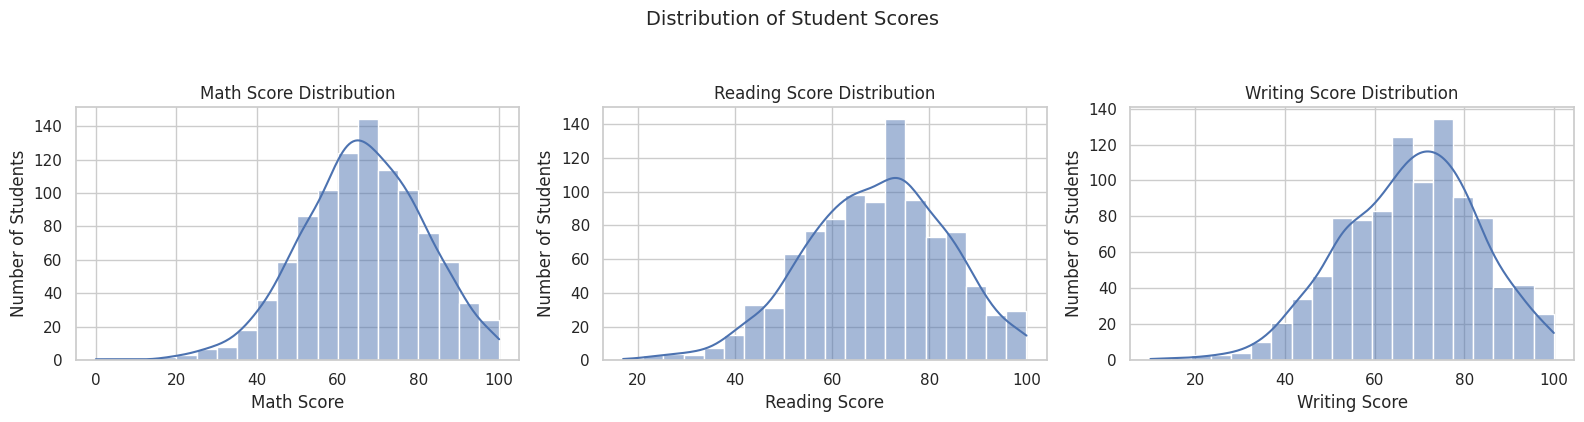

In [54]:

sns.set(style="whitegrid", context="notebook")

fig, axes = plt.subplots(1, 3, figsize=(16, 4))
for ax, col in zip(axes, ["Math", "Reading", "Writing"]):
    sns.histplot(df[col], kde=True, bins=20, ax=ax)
    ax.set_title(f"{col} Score Distribution")
    ax.set_xlabel(f"{col} Score")
    ax.set_ylabel("Number of Students")

fig.suptitle("Distribution of Student Scores", y=1.05, fontsize=14)
plt.tight_layout()
plt.show()


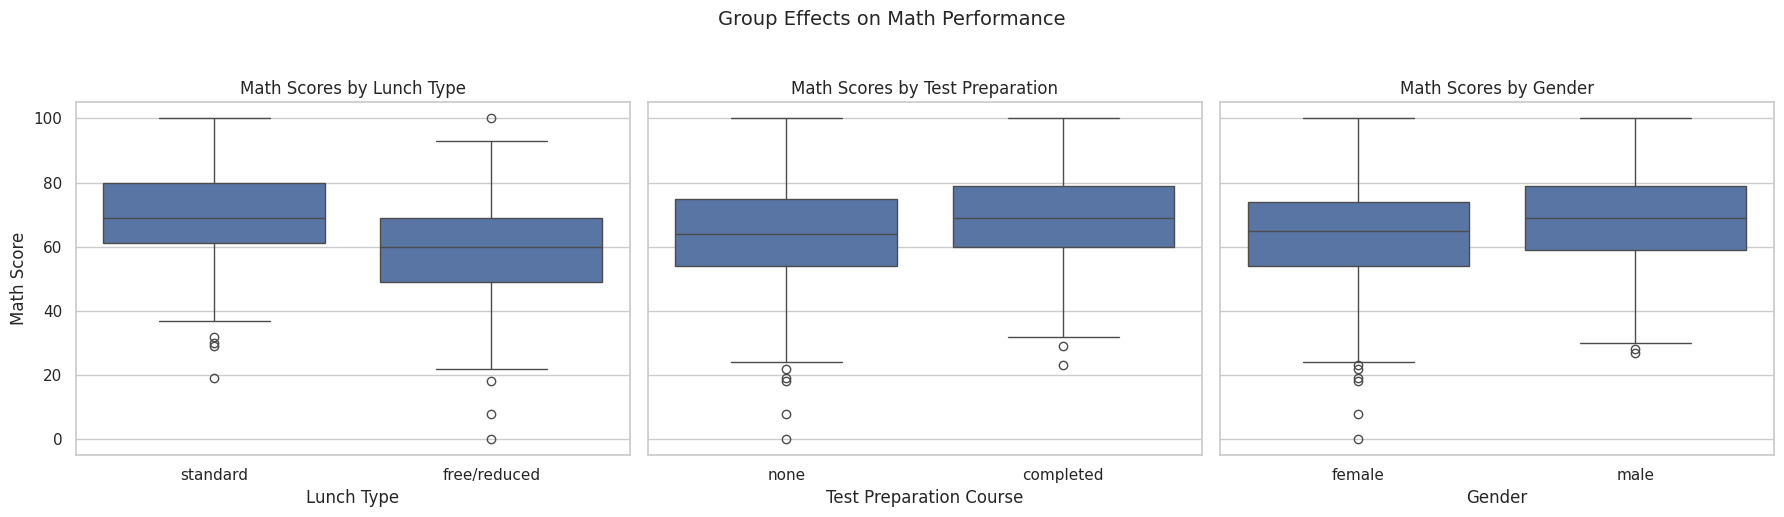

In [55]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

sns.boxplot(data=df, x="lunch", y="Math", ax=axes[0])
axes[0].set_title("Math Scores by Lunch Type")
axes[0].set_xlabel("Lunch Type")
axes[0].set_ylabel("Math Score")

sns.boxplot(data=df, x="Prep_Course", y="Math", ax=axes[1])
axes[1].set_title("Math Scores by Test Preparation")
axes[1].set_xlabel("Test Preparation Course")
axes[1].set_ylabel("")

sns.boxplot(data=df, x="gender", y="Math", ax=axes[2])
axes[2].set_title("Math Scores by Gender")
axes[2].set_xlabel("Gender")
axes[2].set_ylabel("")

fig.suptitle("Group Effects on Math Performance", y=1.03, fontsize=14)
plt.tight_layout()
plt.show()

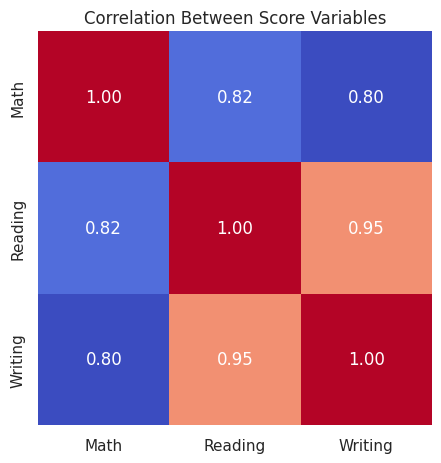

In [56]:
corr = df[["Math","Reading","Writing"]].corr()
plt.figure(figsize=(4.8, 4.8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar=False)
plt.title("Correlation Between Score Variables")
plt.tight_layout()
plt.show()


# Basic Exploration

- The data consists of 1,000 students, with scores for math, reading, and writing.
- Average scores are: Math ≈ 66, Reading ≈ 69, Writing ≈ 68.
- Standard deviations are around 15, indicating moderate spread.
- Scores range from near zero up to 100.

## Visual Analysis

- Histograms show most scores cluster around the mean, with some outliers.
- Boxplots reveal several outliers, especially in math scores, both low and high.
- Pairplots confirm strong positive relationships among all three score types.


## Normality Checks for Score Variables

In this section we formally check whether the **Math**, **Reading** and **Writing** scores follow an approximately normal distribution. We use the Shapiro–Wilk test and Q–Q plots to evaluate whether the normality assumption is reasonable for these variables.

In [58]:
from scipy.stats import ttest_ind

t, p = ttest_ind(data[data['gender']=='male']['math score'],
                 data[data['gender']=='female']['math score'])
print(f"T-test p-value = {p}")


T-test p-value = 9.120185549328822e-08


**Interpretation (Normality):**  
- If the **p-value > 0.05**, we do **not** reject normality and the distribution can be considered approximately normal.  
- If the **p-value < 0.05**, the data significantly deviates from a normal distribution.  

Together with the Q–Q plots, this allows us to decide whether it is appropriate to apply parametric methods such as t‑tests and linear regression models.

Shapiro–Wilk normality test for Math:
  Test statistic = 0.9932, p-value = 0.0001


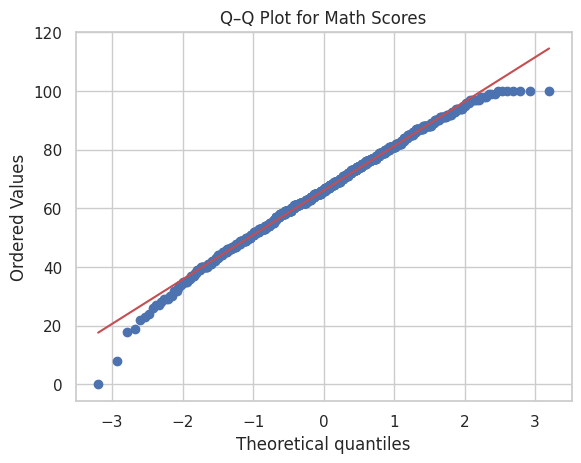

Shapiro–Wilk normality test for Reading:
  Test statistic = 0.9929, p-value = 0.0001


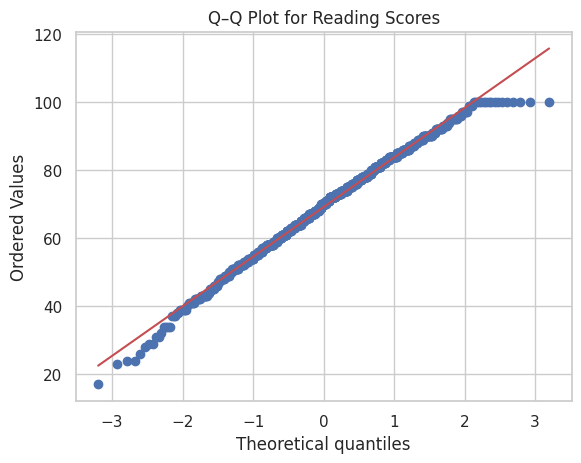

Shapiro–Wilk normality test for Writing:
  Test statistic = 0.9920, p-value = 0.0000


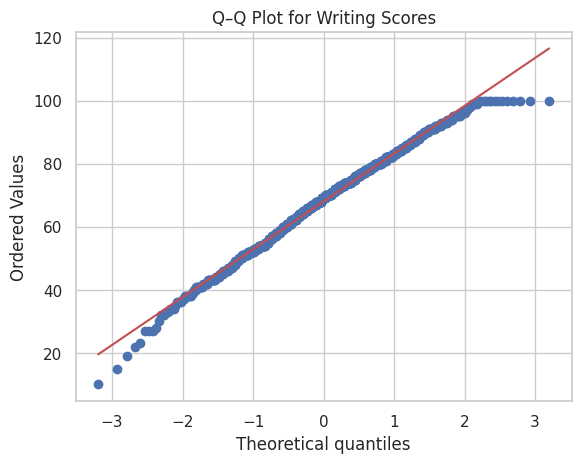

In [89]:
from scipy.stats import shapiro, probplot

score_cols = ["Math", "Reading", "Writing"]

for col in score_cols:
    print(f"Shapiro–Wilk normality test for {col}:")
    stat, p_val = shapiro(df[col])
    print(f"  Test statistic = {stat:.4f}, p-value = {p_val:.4f}")
    probplot(df[col], plot=plt)
    plt.title(f"Q–Q Plot for {col} Scores")
    plt.show()

## Hypothesis Tests: Do Background Factors Affect Math Scores?

In this section we test whether there are significant differences in **Math** scores between groups:
- Students who **completed** the test preparation course vs. those who **did not**.  
- **Male** vs **female** students.

These comparisons are based on independent samples t‑tests and provide an inferential view on how background factors may be associated with performance.

In [60]:
from scipy.stats import ttest_ind

# Test prep effect on Math scores
prep_completed = df[df["Prep_Course"] == "completed"]["Math"]
prep_none = df[df["Prep_Course"] == "none"]["Math"]

t_stat_prep, p_val_prep = ttest_ind(prep_completed, prep_none, equal_var=False)
print("T-test for Math scores by test preparation course:")
print(f"  t-statistic = {t_stat_prep:.4f}, p-value = {p_val_prep:.4f}")


T-test for Math scores by test preparation course:
  t-statistic = 5.7870, p-value = 0.0000


In [61]:
# Gender effect on Math scores
male_math = df[df["gender"] == "male"]["Math"]
female_math = df[df["gender"] == "female"]["Math"]

t_stat_gender, p_val_gender = ttest_ind(male_math, female_math, equal_var=False)
print("\nT-test for Math scores by gender:")
print(f"  t-statistic = {t_stat_gender:.4f}, p-value = {p_val_gender:.4f}")



T-test for Math scores by gender:
  t-statistic = 5.3980, p-value = 0.0000


**Interpretation (T‑tests):**  
- The null hypothesis states that there is **no difference** in average Math scores between the two groups being compared.  
- The alternative hypothesis states that there **is a difference** in average Math scores between the groups.  

If the **p‑value < 0.05**, we reject the null hypothesis and conclude that the difference in mean Math scores is statistically significant.  

After examining mean differences with t‑tests, we next build a multiple linear regression model to predict **Math** scores using **Reading** and **Writing** scores as predictors.

## Regression Model: Predicting Math Scores

We now build a multiple linear regression model to predict **Math** scores from **Reading** and **Writing** scores. This model summarizes the average relationship between the outcome (Math) and the two predictors. Later, we assess the model performance and check standard regression assumptions using residual plots.

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Features and target
X = df[["Reading", "Writing"]]
y = df["Math"]

# Train–test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Fit linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Predictions
y_pred = lin_reg.predict(X_test)

# Evaluation metrics
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Linear Regression Model: Math ~ Reading + Writing")
print("Coefficients:", dict(zip(X.columns, lin_reg.coef_)))
print("Intercept:", lin_reg.intercept_)
print(f"R² score: {r2:.3f}")
print(f"RMSE: {rmse:.3f}")


Linear Regression Model: Math ~ Reading + Writing
Coefficients: {'Reading': np.float64(0.5950394268157673), 'Writing': np.float64(0.2613618931564524)}
Intercept: 6.940865435135265
R² score: 0.698
RMSE: 8.723


**Interpretation (Regression):**  
- The **coefficients** indicate how much the predicted Math score changes, on average, for a one‑point increase in Reading or Writing, holding the other predictor constant.  
- **R²** indicates the proportion of variation in Math scores explained jointly by Reading and Writing.  
- **RMSE** measures the typical size of the prediction error in score units.  

These metrics help to evaluate how well the model summarizes the relationship between the variables and how accurate its predictions are.

## Model Diagnostics & Visualization (Residual Analysis)

To check if our linear regression model is appropriate, we inspect:  

- The relation between **actual** and **predicted** values.  
- The **distribution of residuals** (errors).  
- The pattern of residuals vs. predictions (homoscedasticity).  


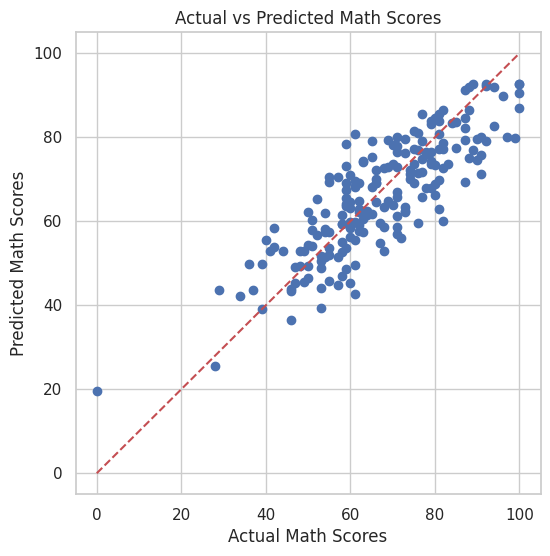

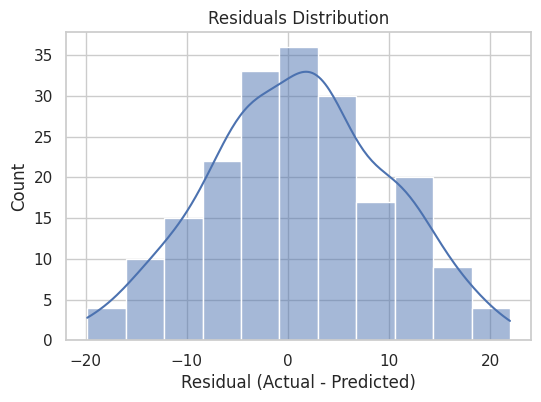

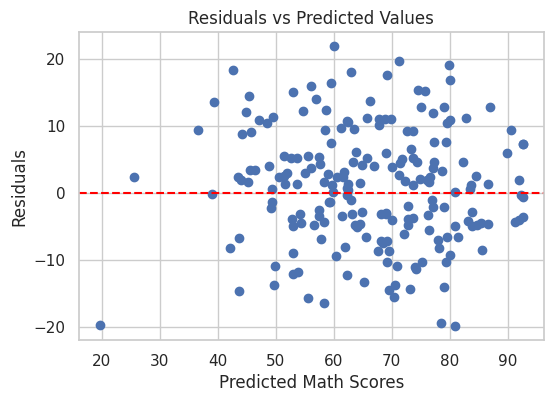

In [91]:

# 1. Actual vs Predicted Scatter Plot
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")
plt.xlabel("Actual Math Scores")
plt.ylabel("Predicted Math Scores")
plt.title("Actual vs Predicted Math Scores")
plt.grid(True)
plt.show()

# 2. Residuals Calculation
residuals = y_test - y_pred

# 3. Histogram of Residuals
plt.figure(figsize=(6, 4))
sns.histplot(residuals, kde=True)
plt.title("Residuals Distribution")
plt.xlabel("Residual (Actual - Predicted)")
plt.ylabel("Count")
plt.grid(True)
plt.show()

# 4. Residuals vs Predicted Values
plt.figure(figsize=(6, 4))
plt.scatter(y_pred, residuals)
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Predicted Math Scores")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values")
plt.grid(True)
plt.show()

**Interpretation (Diagnostics):**  
- Points close to the diagonal in *Actual vs Predicted* indicate good predictive performance.  
- A roughly symmetric, bell-shaped residual distribution suggests that the **normality assumption** is reasonable.  
- Residuals scattered randomly around zero (without clear patterns) support the assumptions of **linearity** and **constant variance** (homoscedasticity).  



To complement linear regression, we fit a **Random Forest Regressor** and inspect "
which features are most important for predicting Math scores.


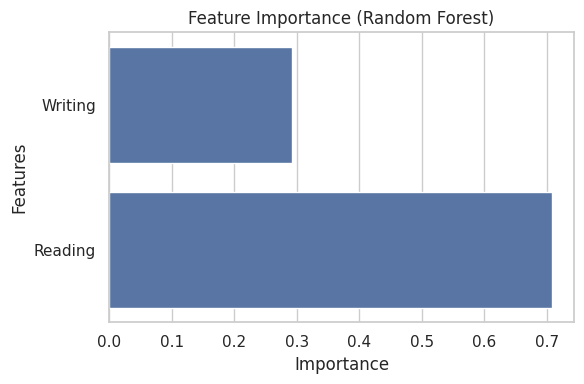

In [64]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

importances = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=True)

plt.figure(figsize=(6, 4))
sns.barplot(x=importances.values, y=importances.index)
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.tight_layout()
plt.show()


Although we only use **Reading** and **Writing** as predictors here, the Random Forest model "
confirms their relative importance for Math performance. In richer models we could also include "
categorical variables (gender, lunch, parental education, test preparation), suitably encoded.


## Conclusion

### Key Insights

- Students who completed the test preparation course tend to obtain higher Math scores, and this difference can be statistically significant.
- There are observable differences in Math scores across groups defined by gender and by socio‑economic indicators such as lunch type or parental education.
- Reading and Writing scores are strong quantitative predictors of Math performance, and the regression model achieves a reasonably high coefficient of determination with an acceptable prediction error.
- Diagnostic plots suggest that the linear regression assumptions are reasonably well satisfied, so the model is a useful tool for summarizing and predicting scores in this dataset.